Alunos: João Martinho e Gustavo Guerreiro

# TRABALHO PARCIAL 01 [OPERADORES MORFOLÓGICOS]

Escolha e implemente um artigo que utilize as técnicas de Morfologia Matemática.  
Obs.: o artigo precisa ser validado com o professor.

Inicialmente, importa-se as bibliotecas matplotlib, cv2 e numpy para realizar as operações necessárias.

In [ ]:
%pip install matplotlib
%pip install opencv-python
%pip install numpy

In [6]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

## Extração da imagem

Para essa aplicação foi escolhida uma foto semelhante à utilizada no artigo original, na região do município de Santarém no Pará. O artigo faz uso de fotos do sensor TM (Thematic Mapper) obtidas através de satélites, apesar do método utilizado para extração de imagens não ser explícito, considerando as referências utilizadas e a utilização da imagem em três bandas (3, 4 e 5), entendeu-se que o satélite utilizado foi o Landset 5, que separa as imagens em três bandas (faixas de comprimento de onda registradas pelo sensor). Nesse caso as faixas de bandas utilzadas pelos autores foram:

| Banda | Faixa Espectral $\mu\text{m}$ |
|----------|----------|
| 3 (Vermelho) | 0,63 – 0,69 |
| 4 (Infravermelho próximo) | 0,76 – 0,90 |
| 5 (Infravermelho médio) | 1,55 – 1,75 |

As imagens detectadas por esse satélite estão disponíveis no serviço EarthExplorer da USGS (United States Geological Survey), neste serviço foi feita uma busca pelo dataset Landsat 4-5 TM C2 L1, e uma foto da região metropolitana de Santarém com baixa densidade de nuvens (como o artigo sugere) foi escolhida. 

In [ ]:
import rasterio
from rasterio.windows import from_bounds

# Abrir o raster
with rasterio.open('banda4.tif') as src:
    # Define os limites do recorte (xmin, ymin, xmax, ymax)
    window = from_bounds(500000, 9500000, 510000, 9510000, src.transform)
    
    # Recortar
    out_image = src.read(window=window)
    
    # Atualizar transform para o recorte
    out_transform = src.window_transform(window)
    
    # Salvar
    out_meta = src.meta.copy()
    out_meta.update({
        "height": out_image.shape[1],
        "width": out_image.shape[2],
        "transform": out_transform
    })
    
    with rasterio.open('banda4_recortada.tif', 'w', **out_meta) as dest:
        dest.write(out_image)


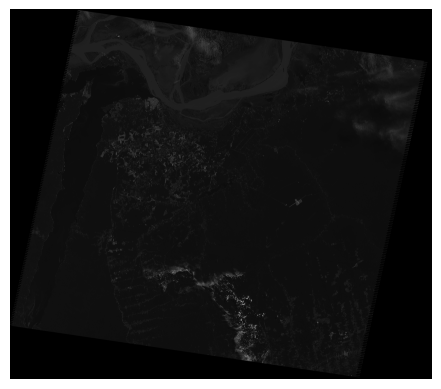

In [7]:
imagem = cv2.imread('LT05_L1TP_227062_20100629_20200823_02_T1_B3.TIF')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.imshow(imagem, 'grey')

Aplica-se a binzarização para ficar apenas com os principais elementos da imagem.

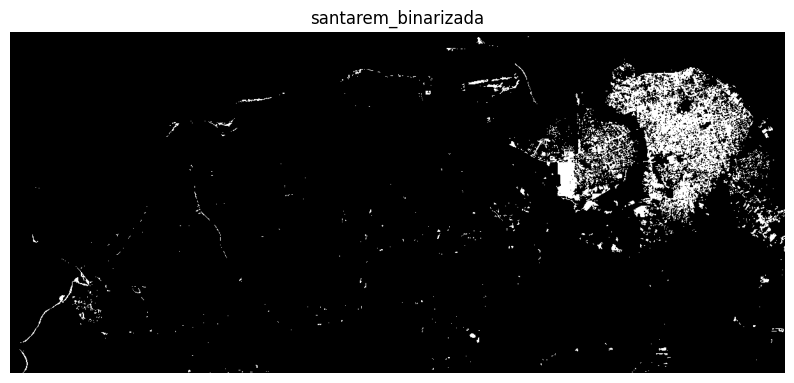

In [ ]:
(T, binarizacao) = cv2.threshold(imagem, 140, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(10, 5))
plt.title('santarem_binarizada')
plt.axis("off")
plt.imshow(binarizacao, 'gray')

O artigo original usa um elemento estrurante (também chamado de *kernel*) de formato octogonal, reproduzimos tal formato em uma matriz 5x5.

In [ ]:
kernel = np.array([
    [0, 1, 1, 1, 0],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [0, 1, 1, 1, 0]
], dtype=np.uint8)

array([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1],
       [1, 1, 1, 1, 

Referências:

GUERRA, Carlos Eduardo. **Detecção de zonas de baixa cobertura vegetal em imagens de satélites através do uso de operadores da Morfologia Matemática**. SIMPÓSIO BRASILEIRO DE SENSORIAMENTO REMOTO, 13., 2007, Florianópolis.

U.S. GEOLOGICAL SURVEY. **EarthExplorer**. [S. l.]. Disponível em: https://earthexplorer.usgs.gov/. Acesso em: 6 set. 2025.

U.S. GEOLOGICAL SURVEY. **What are the band designations for Landsat satellites?**. [S. l.]. Disponível em: https://www.usgs.gov/faqs/what-are-band-designations-landsat-satellites. Acesso em: 6 set. 2025.